In [1]:
install.packages("dplyr") # pandas in r
install.packages("xts") # ts
install.packages("prophet")
install.packages("githubinstall")
install.packages("prophetExt")
install.packages("changepoint")
install.packages("changepointExt")


The downloaded binary packages are in
	/var/folders/zt/sqhb0wp90835352pv3np452xzb6y1c/T//RtmpnAqiKc/downloaded_packages

The downloaded binary packages are in
	/var/folders/zt/sqhb0wp90835352pv3np452xzb6y1c/T//RtmpnAqiKc/downloaded_packages


also installing the dependencies ‘checkmate’, ‘matrixStats’, ‘StanHeaders’, ‘inline’, ‘loo’, ‘RcppEigen’, ‘dygraphs’, ‘extraDistr’, ‘rstan’





  There is a binary version available but the source version is later:
        binary source needs_compilation
prophet    0.4    0.5              TRUE


The downloaded binary packages are in
	/var/folders/zt/sqhb0wp90835352pv3np452xzb6y1c/T//RtmpnAqiKc/downloaded_packages


installing the source package ‘prophet’


also installing the dependencies ‘data.table’, ‘mockery’





The downloaded binary packages are in
	/var/folders/zt/sqhb0wp90835352pv3np452xzb6y1c/T//RtmpnAqiKc/downloaded_packages


Warning message:
“package ‘prophetExt’ is not available (for R version 3.6.1)”



The downloaded binary packages are in
	/var/folders/zt/sqhb0wp90835352pv3np452xzb6y1c/T//RtmpnAqiKc/downloaded_packages


Warning message:
“package ‘changepointExt’ is not available (for R version 3.6.1)”


In [2]:
library(dplyr)
library(xts)
library(prophet)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 


Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last


Loading required package: Rcpp

Loading required package: rlang



In [6]:
library(zoo)

In [25]:
# ds, y, cap
uu <- read.csv("listuu.csv")
names(uu) <- c("ds", "y")
#uu <- as.xts(read.zoo(uu))
tail(uu)

,ds,y
,<fct>,<int>
117,2019-12-26,89105
118,2019-12-27,79665
119,2019-12-28,77563
120,2019-12-29,79240
121,2019-12-30,77891
122,2019-12-31,66030


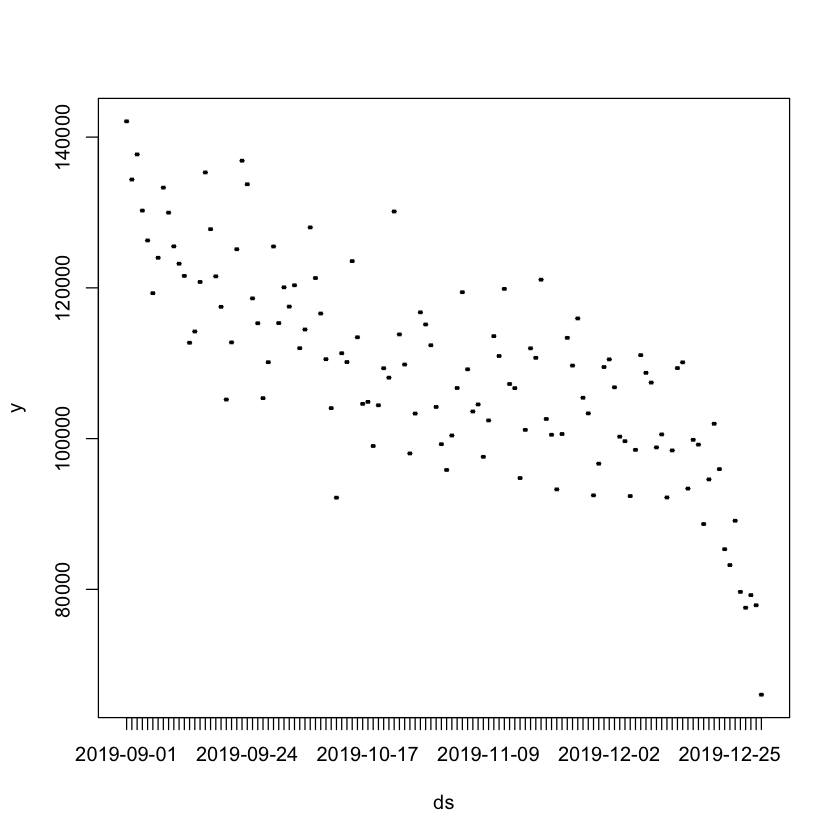

In [26]:
# prophetの引数
plot(uu)

In [27]:
# simple prediction
model <- prophet(uu)

Disabling yearly seasonality. Run prophet with yearly.seasonality=TRUE to override this.

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



In [31]:
future <- make_future_dataframe(model, periods=31)
forcast <- predict(model, future)
head(forcast)

ds,trend,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_lower,yhat_upper,trend_lower,trend_upper,yhat
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-09-01,128400.1,5817.0855,5817.0855,5817.0855,5817.0855,5817.0855,5817.0855,0,0,0,127293.6,140821.3,128400.1,128400.1,134217.2
2019-09-02,128013.3,6524.0534,6524.0534,6524.0534,6524.0534,6524.0534,6524.0534,0,0,0,127353.7,141377.2,128013.3,128013.3,134537.4
2019-09-03,127626.6,5150.3022,5150.3022,5150.3022,5150.3022,5150.3022,5150.3022,0,0,0,125911.7,139728.7,127626.6,127626.6,132776.9
2019-09-04,127239.8,-826.1873,-826.1873,-826.1873,-826.1873,-826.1873,-826.1873,0,0,0,119786.1,133420.8,127239.8,127239.8,126413.6
2019-09-05,126853.0,-1804.3021,-1804.3021,-1804.3021,-1804.3021,-1804.3021,-1804.3021,0,0,0,117302.4,132180.7,126853.0,126853.0,125048.7
2019-09-06,126466.2,-10396.2946,-10396.2946,-10396.2946,-10396.2946,-10396.2946,-10396.2946,0,0,0,109170.7,123234.7,126466.2,126466.2,116069.9


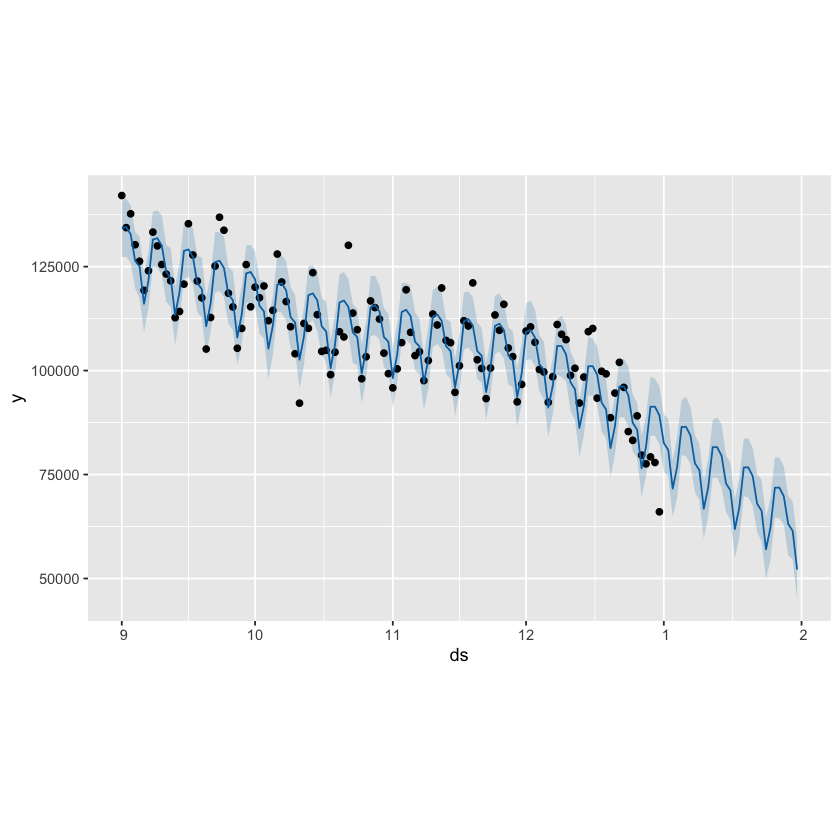

In [32]:
plot(model, forcast)

In [34]:
# 変化点の可視化
plot(model) + add_changepoints_to_plot(model)

ERROR: Error in df_for_plotting(x, fcst):  引数 "fcst" がありませんし、省略時既定値もありません 


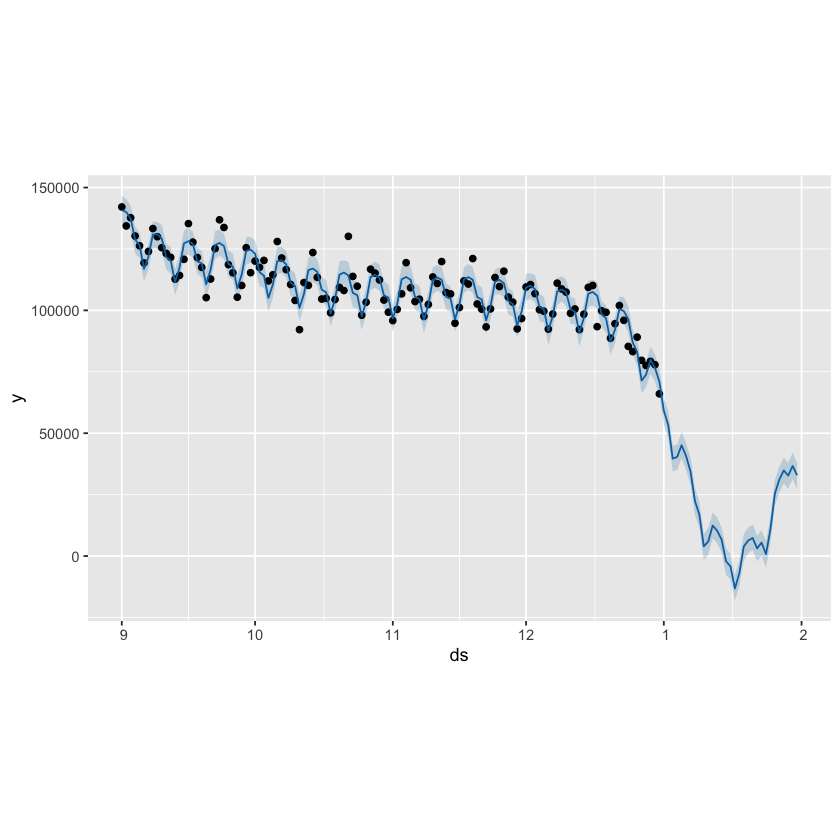

In [56]:
# アルゴリズム変更n.changepoints = 25, changepoint.range = 0.8, seasonality.prior.scale = 10,
uu$cap <- 170000
model <- prophet(df=uu, growth="linear", n.changepoints=5, changepoint.range=0.98, yearly.seasonality=TRUE, daily.seasonality=TRUE)
future <- make_future_dataframe(model, periods=31)
forcast <- predict(model, future)
# plot(model) + add_changepoints_to_plot(model)
plot(model, forcast)

In [54]:
add_changepoints_to_plot(model)

[[1]]
mapping: x = ~ds, y = ~trend 
geom_line: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

[[2]]
mapping: xintercept = ~xintercept 
geom_vline: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 


In [58]:
library(changepoint)

In [60]:
cpt <- cpt.mean(uu$y, method="PELT")